In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2015data.csv to 2015data.csv


In [ ]:
#Create Standard Dev
def stan_dev(inp):
  mean = sum(inp)/len(inp)
  vari = 0
  for a in range(len(inp)):
    vari = vari + (1/(len(inp)-1))*(inp[a]-mean)*(inp[a]-mean)
  return(vari**0.5)

#Regression Function
def reg(inp1, inp2):
  mean1 = sum(inp1)/len(inp1)
  mean2 = sum(inp2)/len(inp2)
  vari1 = 0
  vari2 = 0
  for a in range(len(inp1)):
    vari1 = vari1 + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp1[a]-mean1)

  for a in range(len(inp1)):
    vari2 = vari2 + (1/(len(inp2)-1))*(inp2[a]-mean2)*(inp2[a]-mean2)

  std1 = vari1**0.5
  std2 = vari2**0.5

  r = 0
  for a in range(len(inp1)):
    r = r + (1/(len(inp1)-1))*(inp1[a]-mean1)*(inp2[a]-mean2)/(std1*std2)
  
  B = r*std2/std1
  A = mean2-mean1*B

  return [std1, vari2, r, A, B]

#data fixing
def isNaN(ni):
  return ni != ni


In [ ]:
import io
import numpy as np
import pandas as pd

#Convert raw data to a usable dataframe array
df_sleep = pd.read_csv(io.BytesIO(uploaded['2015data.csv']))
array_sleep = df_sleep.to_numpy()

In [201]:
#Create a list of average sleep
avg_weekdays = array_sleep[:, 25]
avg_weekends = array_sleep[:, 33]

for a in range(len(avg_weekdays)):
  if isNaN(avg_weekdays[a]) == True:
    avg_weekdays[a] = 475.3
  if isNaN(avg_weekends[a]) == True:
    avg_weekends[a] = 524.25
    
avg_total = list(np.add(avg_weekdays*5/(60*7), avg_weekends*2/(60*7)))
#print(avg_total)


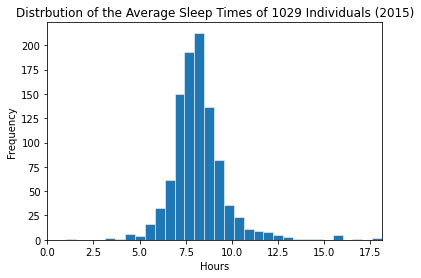

In [ ]:
import matplotlib.pyplot as plt

#Make data
x = avg_total

#Limits
xlow = min(avg_total)
xhigh = max(avg_total)

#Plot:
fig, ax = plt.subplots()

ax.hist(x, bins=32, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, xhigh))

plt.title("Distrbution of the Average Sleep Times of 1029 Individuals (2015)")
plt.xlabel("Hours")
plt.ylabel("Frequency")

plt.show()

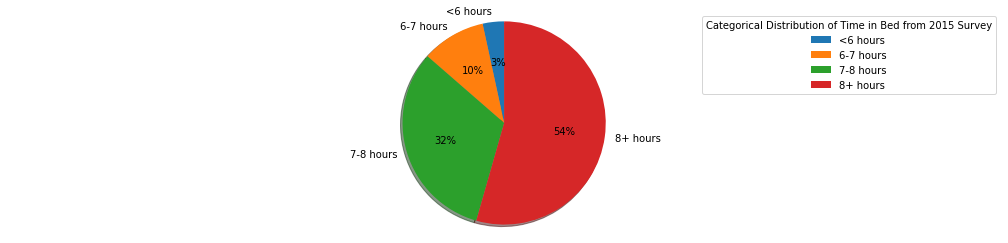

In [ ]:
#Proportion of those who slept: (<6), (6-7), (7, 8), (8+) hours
p1 = 0
p2 = 0
p3 = 0
p4 = 0
for num in avg_total:
  if num < 6:
    p1 += 1
  elif num < 7:
    p2 += 1
  elif num < 8:
    p3 += 1
  else:
    p4 += 1

#Narrow Pie Chart
labels = ["<6 hours", "6-7 hours", "7-8 hours", "8+ hours"]
sizes = [p1, p2, p3, p4]
explode=[0,0,0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Time in Bed from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

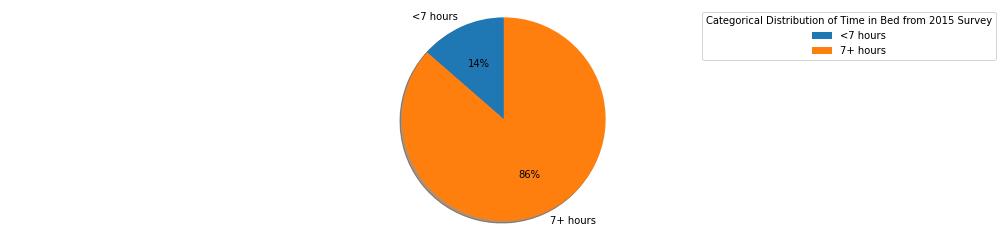

In [ ]:
#Broad Pie Chart
labels = ["<7 hours", "7+ hours"]
sizes = [p1+p2, p3+p4]
explode=[0,0]

plt.pie(sizes, autopct='%1.0f%%', explode=explode,labels=labels,shadow=True,startangle=90, )
plt.axis("equal")
plt.legend(title="Categorical Distribution of Time in Bed from 2015 Survey", loc = 'best')
plt.subplots_adjust(left=0.2, bottom=0.1, right=2.5)
plt.show()

Regression Model: y = 7.53082961311127 + 0.17669599143379724*x
r = 0.10837499073199973


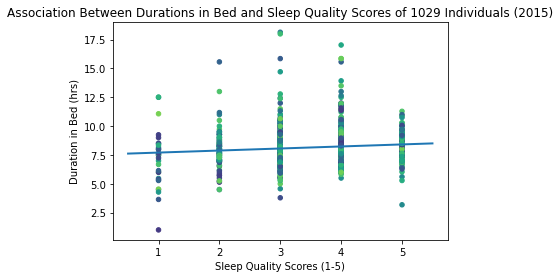

In [199]:
#Relationship between sleep duration and sleep quality
sleep_quality = array_sleep[:, 61]
sleep_quality = list(sleep_quality)

#Scatterplot
#LSRL
outp = reg(sleep_quality, avg_total)
a, b = outp[3], outp[4]
r = outp[2]

#make data
x = np.linspace(0.5, 5.5, 100)
y = a + b*x

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

#Make the data
y = avg_total
x = sleep_quality

#Size and color:
sizes = np.random.uniform(20, 20, len(x))
colors = np.random.uniform(15, 80, len(x))

#Plot
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

plt.title("Association Between Durations in Bed and Sleep Quality Scores of 1029 Individuals (2015)")
plt.xlabel("Sleep Quality Scores (1-5)")
plt.ylabel("Duration in Bed (hrs)")

print("Regression Model: " + "y = " + str(a) + " + " + str(b) + "*x")
print("r = " + str(r))

plt.show()


Regression Model: y = 7.590779919005725 + 0.1753246753246755*x
r = 0.09179097839361454


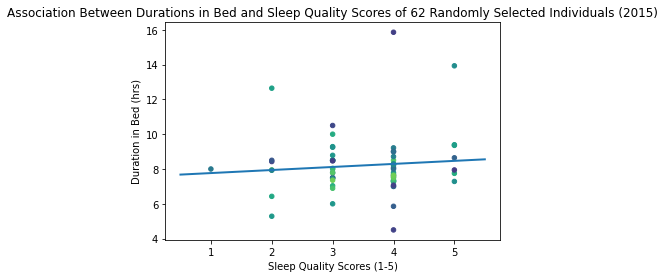

In [200]:
import random

#Relationship between sleep duration and sleep quality
sleep_quality = array_sleep[:, 61]
sleep_quality = list(sleep_quality)

sample = 62

rand_avg_total = random.sample(avg_total, sample)
rand_sleep_quality = random.sample(sleep_quality, sample)

#Scatterplot
#LSRL
outp = reg(rand_sleep_quality, rand_avg_total)
a, b = outp[3], outp[4]
r = outp[2]

#make data
x = np.linspace(0.5, 5.5, 100)
y = a + b*x

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

#Make the data
y = rand_avg_total
x = rand_sleep_quality

#Size and color:
sizes = np.random.uniform(20, 20, len(x))
colors = np.random.uniform(15, 80, len(x))

#Plot
ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

plt.title("Association Between Durations in Bed and Sleep Quality Scores of 62 Randomly Selected Individuals (2015)")
plt.xlabel("Sleep Quality Scores (1-5)")
plt.ylabel("Duration in Bed (hrs)")

print("Regression Model: " + "y = " + str(a) + " + " + str(b) + "*x")
print("r = " + str(r))

plt.show()
